In [156]:
import numpy as np
import random
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

Create a matrix with information of the amount of each type of protocadherin in each neuron. In the model below, there are only two types of protocadherins

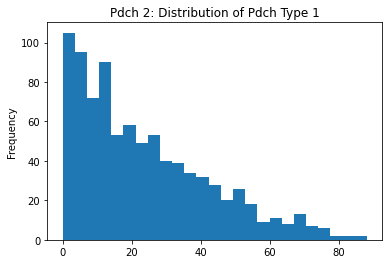

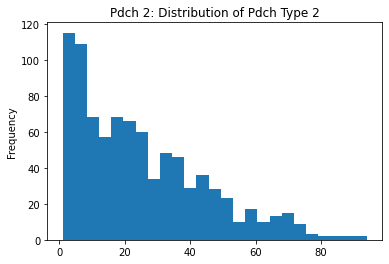

In [157]:
#Assign variables                                 
num_neurons = 872        #number of neurons
num_pdch = 100          #total number of Pdch per neuron
types = 2

#Create matrix of zeros
#Each vector in the matrix will hold information on a neuron.
#Each value in the vector will represent how much of a specific Pdch there is in that neurons
#Ex, [20, 30, 50] --> 20 Pdch of type 1, 30 Pdch of type 2, 50 Pdch of type 3
matrix = np.zeros((num_neurons, types))          

#Assign random combination of Pdch amounts to a neuron so total pdch adds up to 100. 

def random_assigment(n, total):                                  #n = how many pdch types, #total = total pdch amount
    dividers = sorted(random.sample(range(0, total), n+1))
    return [a - b for a, b in zip(dividers + [total], [0] + dividers)]

      
#Assign random pdch amounts for each neurons
x = -1
for i in range(num_neurons):                                   
    x = x + 1
    y = -1
    random_vector = random_assigment(types, num_pdch) 
    for j in range(types):
        y = y + 1      
        matrix[x][y] = random_vector[y]


plt.hist(matrix[:, [0]], bins = 25)
plt.gca().set(title="Pdch %i: Distribution of Pdch Type 1" %types, ylabel='Frequency');
plt.show()

plt.hist(matrix[:, [1]], bins = 25)
plt.gca().set(title="Pdch %i: Distribution of Pdch Type 2"%types, ylabel='Frequency');
plt.show()

#Normalize vector
matrix = matrix/np.sum(matrix)

Create a matrix with Ecludian distances between neurons in different layers

In [158]:
input_layer = np.arange(0,784)    #Separate all the neurons in the matrix with Pdch information into their layers
inner_layer = np.arange(784, 862)
output_layer = np.arange(862, 872)

#Create Ecludian distance matrix between neurons in input and inner layer
distance_l2 = np.zeros((78, 784))       #78 neurons in inner layer and 784 in input

a = -1
for i in range(78):
    a = a + 1
    b = -1
    for j in range(784):
        b = b + 1
        Ecl_distance = norm(matrix[input_layer[b]]- matrix[inner_layer[a]]) #Calculate ecludian distance
        distance_l2[a][b] =  Ecl_distance

#Create Ecludian distance matrix between neurons in inner layer and output layer
distance_out = np.zeros((10, 78))       #78 neurons in inner layer and 10 in ouput

c = -1
for i in range(10):
    c = c + 1
    d = -1
    for j in range(78):
        d = d + 1
        Ecl_distance = norm(matrix[inner_layer[d]]- matrix[output_layer[c]]) #Ecludian distance
        distance_out[c][d] = Ecl_distance
        
#normalize between 0 to 1
#distance_l2 = (distance_l2 - distance_l2.min())/(distance_l2.max()-distance_l2.min())
#distance_out = (distance_out - distance_out.min())/(distance_out.max()-distance_out.min())


Calculate highest values of the two matrices.

In [159]:
#Find unique values of matrices
unique_dl2 = np.unique(distance_l2)
unique_dout = np.unique(distance_out)

#Find max value of matrices
maxdl2 = max(unique_dl2)
maxdout = max(unique_dout)

#Find second max value of matrices
maxdl2_2 = max(unique_dl2[unique_dl2 != maxdl2])
maxdout_2 = max(unique_dout[unique_dout != maxdout])

#determine the highest and second highest maximum of the two matrices combined
if maxdl2 > maxdout:                    
    maxvalue = maxdl2
else: 
    maxvalue = maxdl2

Calculate lowest values of the two matrices

In [160]:
#Find min value of matrices
mindl2 = min(unique_dl2)
mindout = min(unique_dout)

#determine the min the two matrices combined
if mindl2 >= mindout:                    
    minvalue = mindout
else: 
    minvalue = mindl2 

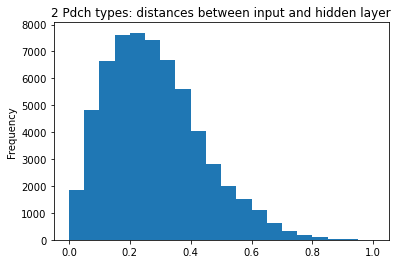

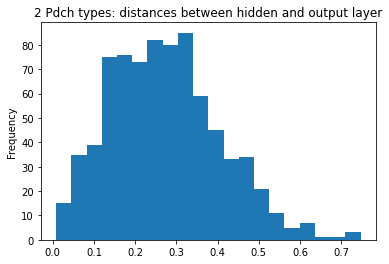

In [161]:
#Normalize between 0-1
distance_l2 = (distance_l2 - minvalue)/(maxvalue - minvalue)
distance_out = (distance_out - minvalue)/(maxvalue - minvalue)
#plot distribution of two matrices 
plt.hist(distance_l2.flatten(), bins=20)
plt.gca().set(title='2 Pdch types: distances between input and hidden layer', ylabel='Frequency');
plt.show()

plt.hist(distance_out.flatten(), bins=20)
plt.gca().set(title='2 Pdch types: distances between hidden and output layer', ylabel='Frequency');
plt.show()

In [162]:
#Find unique values of matrices
unique_dl2 = np.unique(distance_l2)
unique_dout = np.unique(distance_out)

#Find max value of matrices
maxdl2 = max(unique_dl2)
maxdout = max(unique_dout)

#Find second max value of matrices
maxdl2_2 = max(unique_dl2[unique_dl2 != maxdl2])
maxdout_2 = max(unique_dout[unique_dout != maxdout])

#determine the highest and second highest maximum of the two matrices combined
if maxdl2 > maxdout:                    
    if maxdl2_2 >= maxdout:              
        secondmax = maxdl2_2
    else: 
        secondmax = maxdout
if maxdl2 < maxdout:
    if maxdout_2 >= maxdl2:
        secondmax = maxdout_2
    else: 
        secondmax = maxdl2
    
print(secondmax)

0.9947828508543873


**Model 2**: Weights distributed in a way that complete similarity and no similarity between two vectors is given weight zero. Aside that, the higher the similarty (lower distance) the lower the weight between two neurons.

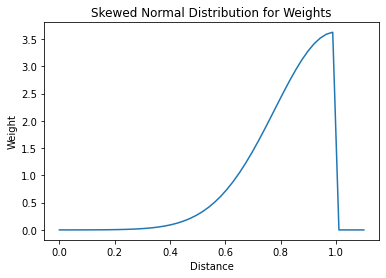

0.00012512729774800507 3.626513822012233 1.1971284615336881e-09


In [195]:
#Create a skewed normal  distribution using the calculated distances
from scipy.stats import skewnorm

X = np.linspace(0, 1.1)    #range of distances/x-axis
plt.plot(X, skewnorm.pdf(X,-500, secondmax+0.0025, 0.22))  #plot the skewed normal 
plt.gca().set(title='Skewed Normal Distribution for Weights', xlabel = 'Distance', ylabel='Weight'); 
plt.show()

#weights at specific distances based on the skwewed normal distribution
y = skewnorm.pdf(0.0, -500, secondmax+0.0025, 0.22)   
y1 = skewnorm.pdf(secondmax, -500, secondmax+0.0025, 0.22)
y2 = skewnorm.pdf(1.0, -500, secondmax+0.0025, 0.22)
print(y, y1, y2)

In [196]:
#Create weight matrix between neurons in input and inner layer
weight_l2 = np.zeros((78, 784))       

a = -1
for i in range(78):
    a = a + 1
    b = -1
    for j in range(784):
        b = b + 1
        weight = skewnorm.pdf(distance_l2[a][b],-500, secondmax+0.0025, 0.22) #weight at specific distance based on the skwewed normal distribution
        weight_l2[a][b] =  weight

#Create Ecludian distance matrix between neurons in inner layer and output layer
weight_out = np.zeros((10, 78))      

c = -1
for i in range(10):
    c = c + 1
    d = -1
    for j in range(78):
        d = d + 1
        weight = skewnorm.pdf(distance_out[c][d],-500, secondmax+0.0025, 0.22)  #weight at specific distance based on the skwewed normal distribution
        weight_out[c][d] =  weight
        
#for all values below 0.0177 (weight at max distance value/most disimillar) assign a weight of zero
a = -1
for i in range(78):
    a = a + 1
    b = -1
    for j in range(784):
        b = b + 1
        if weight_l2[a][b] <= y:
            weight_l2[a][b] =  0
            
c = -1
for i in range(10):
    c = c + 1
    d = -1
    for j in range(78):
        d = d + 1
        if weight_out[c][d] <= y:
            weight_out[c][d] =  0

In [ ]:
#normalize between 0 to 1
weight_l2 = (weight_l2 - weight_l2.min())/(weight_l2.max()-weight_l2.min())
weight_out = (weight_out - weight_out.min())/(weight_out.max()-weight_out.min())

In [ ]:
#Randomly assign + and - values to weights (So exactly half has -)
for i in range(61152):
    x = np.random.randint(0,78)
    y = np.random.randint(0,784)
    weight_l2[x, y] = weight_l2[x , y]* -1
    
for i in range(780):
    x = np.random.randint(0,10)
    y = np.random.randint(0,78)
    weight_out[x, y] = weight_out[x , y]* -1

In [ ]:
#plot distribution of two matrices 
plt.hist(weight_l2.flatten(), bins=30)
plt.gca().set(title='Model 2:Histogram for Weights in Input Layer', ylabel='Frequency');
plt.show()

plt.hist(weight_out.flatten(), bins=30)
plt.gca().set(title='Model 2:Histogram for Weights in Hidden Layer', ylabel='Frequency');
plt.show()

In [ ]:
#Save weight matrix into txt file
np.savetxt('model2weightl2.txt', weight_l2, delimiter = ',')  
np.savetxt('model2weightout.txt', weight_out, delimiter = ',')  

**Weight Matrix based on Model 1**:Create a weight matrix using Ecludian distances. Weights distributed in a way that complete similarity between two vectors is given weight zero. Aside that, the higher the similarty (lower distance) the higher the weight between two neurons



In [ ]:
#Create a skewed normal  distribution using the calculated distances
Y = np.linspace(-0.000025, maxvalue)    #range of distances/x-axis
plt.plot(Y, skewnorm.pdf(Y, 300, minvalue, 0.00039))  #plot the skewed normal
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.gca().set(title='Skewed Normal Distribution for Weights', xlabel = 'Distance', ylabel='Weight'); 
plt.show()

q = skewnorm.pdf(Y, 3000, minvalue- 0.000009, 0.00039)

#weights at specific distances based on the skwewed normal distribution
y = skewnorm.pdf(0.0,3000, minvalue- 0.000009, 0.00039) 
y1 = skewnorm.pdf(minvalue, 3000, minvalue- 0.000009, 0.00039)
y2 = skewnorm.pdf(maxvalue, 3000, minvalue- 0.000009, 0.00039)
print(y, y1, y2)


In [ ]:
#Create weight matrix between neurons in input and inner layer
weightm2_l2 = np.zeros((78, 784))       

a = -1
for i in range(78):
    a = a + 1
    b = -1
    for j in range(784):
        b = b + 1
        weight = skewnorm.pdf(distance_l2[a][b], 3000, minvalue- 0.000009, 0.00039)  #weight at specific distance based on the skwewed normal distribution
        weightm2_l2[a][b] =  weight

#Create Ecludian distance matrix between neurons in inner layer and output layer
weightm2_out = np.zeros((10, 78))      

c = -1
for i in range(10):
    c = c + 1
    d = -1
    for j in range(78):
        d = d + 1
        weight = skewnorm.pdf(distance_out[c][d],3000, minvalue- 0.000009, 0.00039)  #weight at specific distance based on the skwewed normal distribution
        weightm2_out[c][d] =  weight
        
#for all values below 0.0178 (weight at 0 distance/complete similarity) assign a weight of zero
a = -1
for i in range(78):
    a = a + 1
    b = -1
    for j in range(784):
        b = b + 1
        if weightm2_l2[a][b] <= y2:
            weightm2_l2[a][b] =  0
            
c = -1
for i in range(10):
    c = c + 1
    d = -1
    for j in range(78):
        d = d + 1
        if weight_out[c][d] <= y2:
            weight_out[c][d] =  0
            
#normalize between 0 to 1
weightm2_l2 = (weightm2_l2 - weightm2_l2.min())/(weightm2_l2.max()-weightm2_l2.min())
weightm2_out = (weightm2_out - weightm2_out.min())/(weightm2_out.max()-weightm2_out.min())
    

In [ ]:
#Randomly assign + and - values to weights (So exactly half has -)
for i in range(61152):
    x = np.random.randint(0,78)
    y = np.random.randint(0,784)
    weightm2_l2[x, y] = weight_l2[x , y]* -1
    
for i in range(780):
    x = np.random.randint(0,10)
    y = np.random.randint(0,78)
    weightm2_out[x, y] = weight_out[x , y]* -1

In [ ]:
#plot distribution of two matrices 
plt.hist(weightm2_l2.flatten(), bins=30)
plt.gca().set(title='Model 1: Histogram for Weights in Input Layer', ylabel='Frequency');
plt.show()

plt.hist(weightm2_out.flatten(), bins=30)
plt.gca().set(title='Model 1:Histogram for Weights in Hidden Layer', ylabel='Frequency');
plt.show()

In [ ]:
#Save weight matrix into txt file
np.savetxt('model1weightl2.txt', weightm2_l2, delimiter = ',')  
np.savetxt('model1weightout.txt', weightm2_out, delimiter = ',')